In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
from scipy import optimize
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import matplotlib.ticker as ticker
%matplotlib inline

# Linear Fitting

### Creating some fake linear data to fit

In [3]:
# linearly spaced x-axis of 10 values between 1 and 10
x_array = np.linspace(1,10,10)

# linearly spaced y-axis of 10 values between 5 and 200
y_array = np.linspace(5,200,10)

# creating some noise to add the the y-axis data
y_noise = 30*(np.random.ranf(10))
y_array += y_noise

### Plotting the linear data

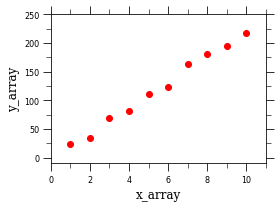

In [4]:
fig = plt.figure(figsize=(4,3))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(x_array, y_array, "ro")

ax1.set_xlim(0,11)
ax1.set_ylim(-10,250)

ax1.set_xlabel("x_array",family="serif",  fontsize=12)
ax1.set_ylabel("y_array",family="serif",  fontsize=12)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(50))

ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

ax1.tick_params(axis='both',which='major', direction="out", top="on", right="on", bottom="on", length=8, labelsize=8)
ax1.tick_params(axis='both',which='minor', direction="out", top="on", right="on", bottom="on", length=5, labelsize=8)

fig.tight_layout()
fig.savefig("rawLinear.png", format="png",dpi=1000)

### Fitting the linear data to a line

In [5]:
# define a fitting function called linear which takes
# in the x-data (x) and returns a line with equation
# mx+b which best fits the data
def linear(x, m, b):
    return m*x + b

In [6]:
# using the scipy library to fit the x- and y-axis data 
# p0 is where you give the function guesses for the fitting parameters
# this function returns:
#   popt_linear: this contains the fitting parameters
#   pcov_linear: estimated covariance of the fitting paramters
popt_linear, pcov_linear = scipy.optimize.curve_fit(linear, x_array, y_array, p0=[((75-25)/(44-2)), 0])

# we then can find the error of the fitting parameters
# from the pcov_linear array
perr_linear = np.sqrt(np.diag(pcov_linear))

In [10]:
# this cell prints the fitting parameters with their errors
print "slope = %0.2f (+/-) %0.2f" % (popt_linear[0], perr_linear[0])
print "y-intercept = %0.2f (+/-) %0.2f" %(popt_linear[1], perr_linear[1])

slope = 22.31 (+/-) 0.67
y-intercept = -3.00 (+/-) 4.18


### Plotting the linear data and the best-fit curve

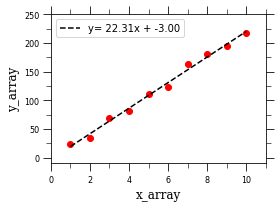

In [11]:
fig = plt.figure(figsize=(4,3))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(x_array, y_array, "ro")
ax1.plot(x_array, linear(x_array, *popt_linear), 'k--', label="y= %0.2fx + %0.2f" % (popt_linear[0], popt_linear[1]))

ax1.set_xlim(0,11)
ax1.set_ylim(-10,250)

ax1.set_xlabel("x_array",family="serif",  fontsize=12)
ax1.set_ylabel("y_array",family="serif",  fontsize=12)

ax1.legend(loc='best')

ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(50))

ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

ax1.tick_params(axis='both',which='major', direction="out", top="on", right="on", bottom="on", length=8, labelsize=8)
ax1.tick_params(axis='both',which='minor', direction="out", top="on", right="on", bottom="on", length=5, labelsize=8)

fig.tight_layout()
fig.savefig("fittedLinear.png", format="png",dpi=1000)

# Single Exponential Fitting

### Creating some exponential data to fit

In [13]:
# will use the same x-axis that we used for the linear data
# then, we take that x-axis data and make an exponential from it
y_array_exp = np.exp(-x_array*0.7)

# creating some noise to add the the y-axis data
y_noise_exp = (np.exp((np.random.ranf(10))))/30
y_array_exp += y_noise_exp

### Plotting the exponential data

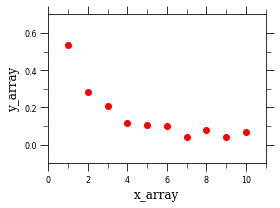

In [14]:
fig = plt.figure(figsize=(4,3))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(x_array, y_array_exp, "ro")

ax1.set_xlim(0,11)
ax1.set_ylim(-0.1,0.7)

ax1.set_xlabel("x_array",family="serif",  fontsize=12)
ax1.set_ylabel("y_array",family="serif",  fontsize=12)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))

ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

ax1.tick_params(axis='both',which='major', direction="out", top="on", right="on", bottom="on", length=8, labelsize=8)
ax1.tick_params(axis='both',which='minor', direction="out", top="on", right="on", bottom="on", length=5, labelsize=8)

fig.tight_layout()
fig.savefig("rawExponential.png", format="png",dpi=1000)

### Fitting the exponential data to single exponential function

In [15]:
# define a fitting function called exponentail which takes
# in the x-data (x) and returns an exponential curve with equation
# a*exp(x*k) which best fits the data
def exponential(x, a, k, b):
    return a*np.exp(x*k) + b

In [16]:
# using the scipy library to fit the x- and y-axis data 
# p0 is where you give the function guesses for the fitting parameters
# this function returns:
#   popt_exponential: this contains the fitting parameters
#   pcov_exponential: estimated covariance of the fitting paramters
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, x_array, y_array_exp, p0=[1,-0.5, 1])

# we then can find the error of the fitting parameters
# from the pcov_linear array
perr_exponential = np.sqrt(np.diag(pcov_exponential))

In [18]:
# this cell prints the fitting parameters with their errors
print "pre-exponential factor = %0.2f (+/-) %0.2f" % (popt_exponential[0], perr_exponential[0])
print "rate constant = %0.2f (+/-) %0.2f" % (popt_exponential[1], perr_exponential[1])

pre-exponential factor = 0.90 (+/-) 0.08
rate constant = -0.65 (+/-) 0.07


### Plotting the exponential data and the best-fit curve

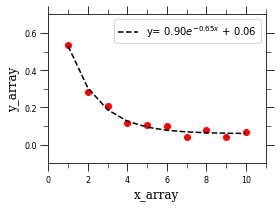

In [19]:
fig = plt.figure(figsize=(4,3))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(x_array, y_array_exp, "ro")
ax1.plot(x_array, exponential(x_array, *popt_exponential), 'k--', \
         label="y= %0.2f$e^{%0.2fx}$ + %0.2f" % (popt_exponential[0], popt_exponential[1], popt_exponential[2]))

ax1.set_xlim(0,11)
ax1.set_ylim(-0.1,0.7)

ax1.set_xlabel("x_array",family="serif",  fontsize=12)
ax1.set_ylabel("y_array",family="serif",  fontsize=12)

ax1.legend(loc='best')

ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))

ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

ax1.tick_params(axis='both',which='major', direction="out", top="on", right="on", bottom="on", length=8, labelsize=8)
ax1.tick_params(axis='both',which='minor', direction="out", top="on", right="on", bottom="on", length=5, labelsize=8)

fig.tight_layout()
fig.savefig("fittedExponential.png", format="png",dpi=1000)

# Bi-Exponential Fitting

### Creating some bi-exponentially decaying data to fit

In [20]:
# will use the same x-axis that we used for the linear data
# then, we take that x-axis data and make an exponential from it
y_array_2exp = (np.exp(-x_array*0.1) + np.exp(-x_array*1))

# creating some noise to add the the y-axis data
y_noise_2exp = (np.exp((np.random.ranf(10))))/30
y_array_2exp += y_noise_exp

### Plotting the bi-exponential data

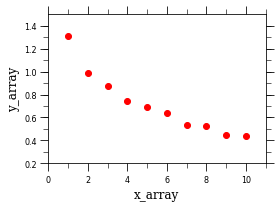

In [21]:
fig = plt.figure(figsize=(4,3))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(x_array, y_array_2exp, "ro")

ax1.set_xlim(0,11)
ax1.set_ylim(0.2,1.5)

ax1.set_xlabel("x_array",family="serif",  fontsize=12)
ax1.set_ylabel("y_array",family="serif",  fontsize=12)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))

ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

ax1.tick_params(axis='both',which='major', direction="out", top="on", right="on", bottom="on", length=8, labelsize=8)
ax1.tick_params(axis='both',which='minor', direction="out", top="on", right="on", bottom="on", length=5, labelsize=8)

fig.tight_layout()
fig.savefig("rawBiexponential.png", format="png",dpi=1000)

In [22]:
# define a fitting function called exponentail which takes
# in the x-data (x) and returns an exponential curve with equation
# a*exp(x*k) which best fits the data
def _2exponential(x, a, k1, b, k2, c):
    return a*np.exp(x*k1) + b*np.exp(x*k2) + c

In [23]:
# using the scipy library to fit the x- and y-axis data 
# p0 is where you give the function guesses for the fitting parameters
# this function returns:
#   popt_exponential: this contains the fitting parameters
#   pcov_exponential: estimated covariance of the fitting paramters
popt_2exponential, pcov_2exponential = scipy.optimize.curve_fit(_2exponential, x_array, y_array_2exp, p0=[1,-0.1, 1, -1, 1])

# we then can find the error of the fitting parameters
# from the pcov_linear array
perr_2exponential = np.sqrt(np.diag(pcov_2exponential))

In [25]:
# this cell prints the fitting parameters with their errors
print "pre-exponential factor 1 = %0.2f (+/-) %0.2f" % (popt_2exponential[0], perr_exponential[0])
print "rate constant 1 = %0.2f (+/-) %0.2f" % (popt_2exponential[1], perr_2exponential[1])
print "pre-exponential factor 2 = %0.2f (+/-) %0.2f" % (popt_2exponential[2], perr_exponential[2])
print "rate constant 2 = %0.2f (+/-) %0.2f" % (popt_2exponential[3], perr_2exponential[3])

pre-exponential factor 1 = 1.04 (+/-) 0.08
rate constant 1 = -0.18 (+/-) 0.06
pre-exponential factor 2 = 4.05 (+/-) 0.01
rate constant 2 = -3.09 (+/-) 5.99


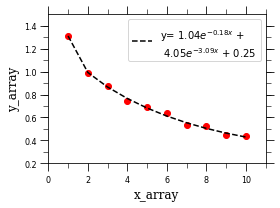

In [26]:
fig = plt.figure(figsize=(4,3))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(x_array, y_array_2exp, "ro")
ax1.plot(x_array, _2exponential(x_array, *popt_2exponential), 'k--', \
   label="y= %0.2f$e^{%0.2fx}$ + \n %0.2f$e^{%0.2fx}$ + %0.2f" % (popt_2exponential[0], popt_2exponential[1], popt_2exponential[2],\
                                                               popt_2exponential[3], popt_2exponential[4]))

ax1.set_xlim(0,11)
ax1.set_ylim(0.2,1.5)

ax1.set_xlabel("x_array",family="serif",  fontsize=12)
ax1.set_ylabel("y_array",family="serif",  fontsize=12)

ax1.legend(loc='best')

ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))

ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

ax1.tick_params(axis='both',which='major', direction="out", top="on", right="on", bottom="on", length=8, labelsize=8)
ax1.tick_params(axis='both',which='minor', direction="out", top="on", right="on", bottom="on", length=5, labelsize=8)

fig.tight_layout()
fig.savefig("fitBiexponential.png", format="png",dpi=1000)